In [1]:
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('points.txt', header = None)

In [3]:
class DBSCAN:
    def __init__(self, dataset, eps, MinPts):
        self.dataset = dataset
        #半径
        self.eps = eps
        #邻域内最少的点数
        self.MinPts = MinPts
        self.cluster_num = 0
        #用来存储聚类结果
        self.clusters = [0 for i in range(len(dataset))]
    
    def dist(self, x1, x2):
        return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)
    
    def ExpandCluster(self):
        #点的个数
        num = len(self.dataset)
        #未访问过的点
        unvisited = [i for i in range(num)]
        #访问过的点
        visited = []
        while len(unvisited) > 0:
            #随便选一个没有访问过的点
            p_index = random.choice(unvisited)
            #移除该点
            unvisited.remove(p_index)
            #将该点加入到已访问列表中
            visited.append(p_index)
            #p点邻域中的点合集
            N = []
            #遍历所有点
            for index in range(num):
                #如果点在p点的领域中即加入合集
                if (self.dist(self.dataset[index], self.dataset[p_index]) <= self.eps):
                    N.append(index)
            #如果p邻域中的点的个数大于阈值,则p是核心对象
            if len(N) >= self.MinPts:
                self.cluster_num += 1
                self.clusters[p_index] = self.cluster_num
                #遍历在p邻域内的点
                for pi in N:
                    #如果是未访问的点
                    if pi in unvisited:
                        unvisited.remove(pi)
                        visited.append(pi)
                        #M用来存储在邻域内的点
                        M = []
                        #如果在邻域内就装进M
                        for j in range(num):
                            if (self.dist(self.dataset[j], self.dataset[pi]) <= self.eps):
                                M.append(j)
                        #如果领域中的点数大于阈值
                        if len(M) >= self.MinPts:
                            for t in M:
                                if t not in N:
                                    N.append(t)
                    #如果是已经访问过的点,聚类              
                    if self.clusters[pi] == 0:
                        self.clusters[pi] = self.cluster_num
            #噪声点
            else:
                self.clusters[p_index] = 0
        return self.clusters
        

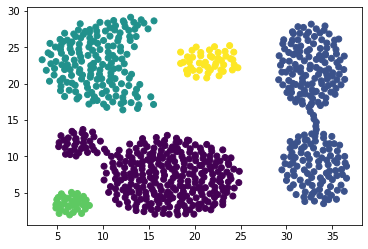

In [4]:
dbs = DBSCAN(data.values, 2, 5)
results = dbs.ExpandCluster()
plt.scatter(data.values[:,0], data.values[:,1], c = results)
plt.show()

### 调参(随便试试)

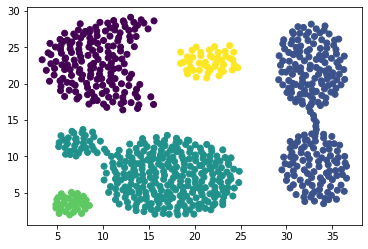

In [5]:
dbs = DBSCAN(data.values, 2, 9)
results = dbs.ExpandCluster()
plt.scatter(data.values[:,0], data.values[:,1], c = results)
plt.show()

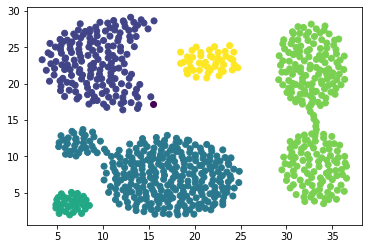

In [6]:
dbs = DBSCAN(data.values, 2, 11)
results = dbs.ExpandCluster()
plt.scatter(data.values[:,0], data.values[:,1], c = results)
plt.show()

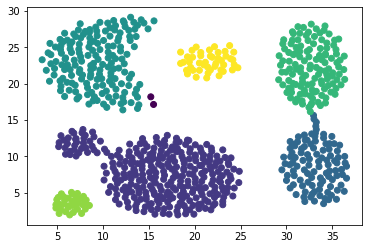

In [7]:
dbs = DBSCAN(data.values, 2, 13)
results = dbs.ExpandCluster()
plt.scatter(data.values[:,0], data.values[:,1], c = results)
plt.show()